# TP2 Interpolation Numérique 
<img src="tpan2.png">

## Exercice 1

**Polynome d'interpolation de Lagrange** 
> Soient $(x_0,y_0), \ldots,(x_k,y_k),\ldots ,(x_n,k_n)$ $n+1$ points deux à deux distincts, le polynôme d'interpolation de Lagrange associés à ces points supports est défini par :
> $$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{n})}{(x_0-x_1)(x_0-x_2)\ldots(x_0-x_{n})}$ et $L_{k}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{k-1})(x-x_{k+1})\ldots(x_0-x_{n})}{(x_k-x_0)(x_k-x_1)\ldots(x_k-x_{k-1})(x_k-x_{k+1})\ldots(x_k-x_{n})}$ pour $k\in \{1,\ldots,n\}$

1) Que renvoie la fonction PR lorsqu'on lui déclare  **x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))**  et  **y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))**  deux vecteurs de même longueur  `n` et `c`  un nombre réel donné.

In [21]:
import numpy as np
def PR(x,y,c):
    S = y.copy()
    n = len(x) 
    for j in range(0, n):
        L = [c - a for a in x]
        for k in range(0,n) :
            if (k == j):
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])
        S[j] = S[j]*np.prod(L)
    return(np.sum(S))

In [22]:
X=[1,2,3,4]
Y=[-1,0,2,1]
for i in X:
    print(PR(X,Y,i))

-1.0
0.0
2.0
1.0


2) Que contient le vecteur  LL  après la fin de la boucle  kk .

In [23]:
from numpy import prod
def PR (x,y,c):
    s=[]
    n=len(x)
    for c in x:
        for j in range(n):
            l=[c-t for t in x]
            for k in range (n):
                    if k==j:
                        l[k]=1
                    else:
                         l[k]=l[k]/(x[j]-x[k])
            s.append(y[j]*prod(l))
        return sum(s) 

In [24]:
x=[1,2,3,4]
y=[-1,0,2,1]
c=3
for t in x:
    print(PR(x,y,c))

-1.0
-1.0
-1.0
-1.0


> PR : permet de donner  le polynôme d'interpolation de Lagrange pour les deux vecteur x et y.

2) Que contient le vecteur  LL  après la fin de la boucle  kk .

In [25]:
x=[1,2,3,4]
y=[-1,0,2,1]

In [26]:
def pr(x,y,c):
    S = [] 
    n = len(x)
    for c in x:
            for j in range(n):
                L =[c-xx for xx in x]
                for k in range(n):
                    if (k == j):                
                        L[k] = 1
                    else:
                        L[k] = L[k]/(x[j] - x[k])   
                S.append(y[j]*prod(L))

            return L[3]

In [27]:
for i in x:
    print(pr(x,y,i))

1
1
1
1


3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

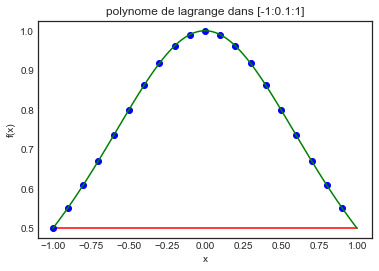

In [28]:
x=np.arange(-1,1,0.1)
pts=[]
f= lambda x:1/(1+x**2)
y=f(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pts.append(PR(x,y,t[i]))
plt.plot(t,pts,"r",x,y,"bo",t,f(t),"g")
plt.title("polynome de lagrange dans [-1:0.1:1]")
plt.xlabel ("x")
plt.ylabel ("f(x)")
plt.show()    

4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

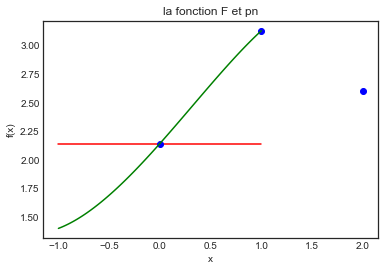

In [32]:
import math
x=np.arange(0,3)
pts=[]
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f2 = np.vectorize(f)
y=f2(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pts.append(PR(x,y,t[i]))
plt.plot(t,pts,"r",x,y,"bo",t,f2(t),"g")
plt.title("la fonction F et pn")
plt.xlabel ("x")
plt.ylabel ("f(x)")
plt.show()    

2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

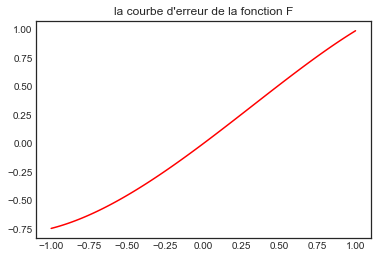

In [35]:
x=np.arange(0,3)
pts=[]
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f2 = np.vectorize(f)
y=f2(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pts.append(PR(x,y,t[i]))
plt.title("la courbe d'erreur de la fonction F")
plt.plot(t,f2(t)-pts,'r') 
plt.show()


## Exercice 2  ( Phenomène de Runge )

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

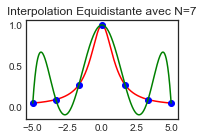

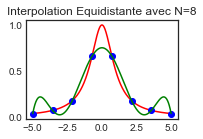

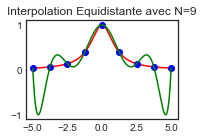

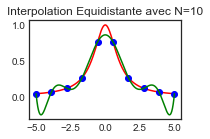

In [36]:
N=7
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7")
plt.show()
####################################################
N=8
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=8")
plt.show()
####################################################
N=9
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")
plt.show()
####################################################
N=10
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")
plt.show()

> Donc,le polynôme d'interpolation de Lagrange de la fonction  𝑓 ne convergent pas correctement aux voisinages de  −1  et  1 , pour  𝑁=7,8,9,10.

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :$$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev est meilleure qu'une interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [37]:
def tcheb(a,b,n):
    V=[]
    for k in range (n):
        V.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return V   

In [38]:
tcheb(-5,5,11)

[-4.755282581475767,
 -5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

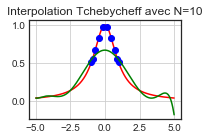

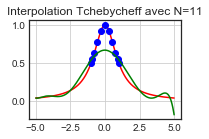

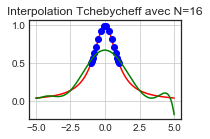

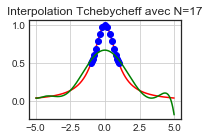

In [41]:
import matplotlib.pyplot as plt
import numpy as np
N = 10
f = lambda x:  1./(1 + x**2)
Xt=np.polynomial.chebyshev.Chebyshev(np.array([0]*10+[1])).roots()
Yt = f(Xt)
pt = np.polyfit(Xt, Yt, N - 1 )
t = np.linspace(-5, 5, 1000)
plt.subplot(2, 2, 1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Tchebycheff avec N=10')
plt.grid(True)   
plt.show()
###################################################################
import matplotlib.pyplot as plt
import numpy as np
N = 11
f = lambda x:  1./(1 + x**2)
Xt=np.polynomial.chebyshev.Chebyshev(np.array([0]*11+[1])).roots()
Yt = f(Xt)
pt = np.polyfit(Xt, Yt, N - 1)
t = np.linspace(-5, 5, 1000)
plt.subplot(2, 2, 1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Tchebycheff avec N=11')
plt.grid(True)   
plt.show()
##################################################################
import matplotlib.pyplot as plt
import numpy as np
N = 16
f = lambda x:  1./(1 + x**2)
Xt=np.polynomial.chebyshev.Chebyshev(np.array([0]*16+[1])).roots()
Yt = f(Xt)
pt = np.polyfit(Xt, Yt, N - 1)
t = np.linspace(-5, 5, 1000)
plt.subplot(2, 2, 1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Tchebycheff avec N=16')
plt.grid(True)   
plt.show()
##################################################################
import matplotlib.pyplot as plt
import numpy as np
N = 17
f = lambda x:  1./(1 + x**2)
Xt=np.polynomial.chebyshev.Chebyshev(np.array([0]*17+[1])).roots()
Yt = f(Xt)
pt = np.polyfit(Xt, Yt, N - 1)
t = np.linspace(-5, 5, 1000)
plt.subplot(2, 2, 1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(p,t),'g')
plt.title('Interpolation Tchebycheff avec N=17')
plt.grid(True)   
plt.show()

## Exercice 3

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>

In [43]:
def intN(x,y):
    m=len(x)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f

In [44]:
x=[-1,0,2,5]
y=[6,1,3,66]
intN(x,y)

array([ 0.        , -5.        ,  0.66666667, 10.5       ])

In [45]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p

In [46]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
intNval(x,y,t)

array([   7., -118.,   27.,  838.])

2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

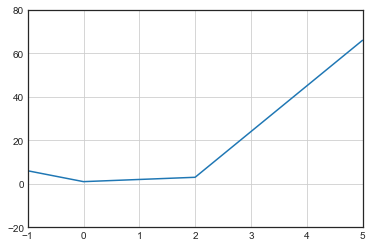

In [48]:
import math
import matplotlib.pyplot as plt
import numpy as np
x=[-1,0,2,5]
y=[6,1,3,66]
plt.plot(x, y)
plt.axis([-1., 5., -20., 80.])
plt.grid()
plt.show()

3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).

In [50]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[0]

7.0

In [51]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[1]

-118.0